## Progress Report & Next Steps

**Last Updated:** January 30, 2026

### Progress Made
- ✅ Notebook structure created with complete implementation
- ✅ All three model classes implemented:
  - `VGGNet_BN` - Baseline with standard BatchNorm
  - `VGGNet_NoisyBN` - Noisy version with forced ICS (Santurkar et al Algorithm 1)
  - `VGGNet_NoBN` - Control without BatchNorm
- ✅ Noise implementation corrected to match Santurkar et al:
  - Two-level hierarchical sampling (per-unit parameters, then per-sample noise)
  - Correct parameters: nμ=0.5, nσ=1.25, rμ=0.1, rσ=0.1
  - Noise applied AFTER BatchNorm (not before)
- ✅ Fixed nnx.List compatibility for Flax NNX
- ✅ All models support intermediate activation capture
- ✅ Training loop with simultaneous training and ICS collection
- ✅ Real-time visualization (loss, train/test accuracy)
- ✅ ICS measurement: Captures mean/variance of activations at layers 0, 5, 9
- ✅ ICS analysis: Plots successive moment changes (Santurkar et al Figure 7)
- ✅ Results visualization and hypothesis testing

### Current Configuration
- Dataset: CIFAR-10 (no augmentation)
- Batch size: 128
- Architecture: VGG-style (10 conv + 3 FC layers)
- Learning rate: 0.035
- Momentum: 0.9
- Noise parameters: nμ=0.5, nσ=1.25, rμ=0.1, rσ=0.1 (Santurkar et al)
- Training epochs: 39
- ICS sampling: Every 10 iterations (ICS_SAMPLE_INTERVAL=10)
- ICS target layers: [0, 5, 9] (early, middle, late)
- Random seeds: 1337 (models), 1338 (noise)

### Status
- ✅ Notebook is complete and ready to execute
- ✅ All cells are syntactically valid
- ✅ All bugs fixed (nnx.List, PRNG keys, noise implementation)
- ✅ ICS measurement fully integrated

### Next Steps

**Phase 1: Initial Validation (DO THIS FIRST)**
1. Run dataset loading cell - verify CIFAR-10 loads correctly
2. Run model initialization cell - verify all three models initialize with correct param counts
3. Run validation cell - check output shapes and noise behavior
4. **STOP and verify all checks pass before proceeding**

**Phase 2: Short Training Run**
1. Modify `num_epochs = 3` (in training loop cell)
2. Run training loop - verify:
   - All models train without crashes
   - Loss decreases for all models
   - Accuracy improves
   - Visualizations work correctly
   - ICS statistics are being collected
3. Run ICS analysis cell - verify plots generate correctly
4. Stop and analyze short results

**Phase 3: Full Experiment Execution**
1. Restore `num_epochs = 39`
2. Run full training loop (~6-8 hours expected)
   - ICS collection happens automatically every 10 iterations
   - Slight overhead (~5-10% slower) from ICS collection
3. Monitor for issues:
   - NaN losses or diverging
   - Out-of-memory errors
   - Training instability
   - ICS stats not populating
4. Wait for completion or interrupt early if needed

**Phase 4: Results Analysis**
1. Run results visualization cell
2. Run ICS analysis cell - view moment change plots
3. Run hypothesis testing cell
4. Check two key results:
   - Performance: |Baseline BN - Noisy BN| < 2%?
   - ICS: Noisy BN shows larger deltas than Baseline BN?
5. Document findings

### Expected Outcomes

**Performance:**
- If Santurkar et al hypothesis is correct:
  - |Baseline BN - Noisy BN| < 2% (similar performance)
  - Both BN models >> Non-BN (large gap)
  - This suggests BN effectiveness is independent of ICS reduction

- If hypothesis is NOT supported:
  - |Baseline BN - Noisy BN| > 2%
  - May indicate ICS reduction plays a role

**ICS Measurements:**
- Noisy BN should show MUCH larger delta values than Baseline BN
- This confirms the noise successfully forces high ICS
- If Noisy BN performs well despite high ICS, it supports Santurkar et al

### Known Issues to Watch For
- Memory usage: 3 models + ICS stats (~200 KB, negligible)
- Training time: ~6-8 hours with ICS collection (~5-10% overhead)
- ICS sample interval: Can adjust ICS_SAMPLE_INTERVAL if needed (10 → 5 for more samples, 10 → 20 for less overhead)
- PRNG key state: Properly managed with nnx.Variable wrapper
- nnx.List requirement: All model conv lists now use nnx.List for Flax NNX compatibility

### New Features Added
- **ICS Measurement System**: Tracks mean/variance of activations throughout training
- **Santurkar et al Figure 7 Replication**: Plots successive moment changes for layers 0, 5, 9
- **Intermediate Activation Capture**: All models support `return_intermediates=True`
- **Train Mode ICS**: Statistics collected in training mode (not eval mode) to capture actual batch dynamics

---
**Ready to proceed with Phase 1 (Initial Validation)?**

## References

### Papers

1. **Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018).** [How does batch normalization help optimization?](https://arxiv.org/abs/1805.11604). NeurIPS 31.
   - Key finding: BN's effectiveness is independent of Internal Covariate Shift (ICS) reduction
   - Proposed mechanism: Loss landscape smoothing, gradient predictiveness, better initialization

2. **Ioffe, S., & Szegedy, C. (2015).** [Batch normalization: Accelerating deep network training by reducing internal covariate shift](https://arxiv.org/abs/1502.03167). ICML 2015.
   - Original ICS theory: BN reduces distributional shift in layer activations
   - This notebook tests Santurkar's claim that ICS reduction is not the causal mechanism

3. **Duchi, J., Hazan, E., Singer, Y., & Chandra, T. (2011).** [Adaptive Subgradient Methods for Online Learning and Stochastic Optimization](https://jmlr.org/papers/v12/duchi11a.html). JML 12(7):2121-2159.
   - Original Adagrad optimizer with adaptive learning rates based on gradient history
   - AdaGrad uses diagonal preconditioning - each dimension gets its own learning rate

4. **Zeiler, M. D. (2012).** [ADADELTA: An Adaptive Learning Rate Method](https://arxiv.org/abs/1212.5701). Technical report.
   - Introduced Adagrad with root mean squared propagation (RMSProp)
   - Uses exponential moving average instead of cumulative sum, solving AdaGrad's vanishing gradient problem

5. **Kingma, D. P., & Ba, J. (2015).** [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980). ICLR (2).
   - Combines momentum (RMSProp) with adaptive learning rates
   - Most widely used optimizer for deep learning

6. **Loshchilov, I., & Hutter, F. (2017).** [Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101). ICLR (3).
   - AdamW separates weight decay from adaptive learning rate for better regularization
   - Addresses Adam's weight decay issues

### Blog Posts & Tutorials

1. [How Does Batch Normalization Work? Part 1](https://blog.vikrampawar.com/how-batchnorm-works.html) - Initial BN introduction and Ioffe's ICS theory
2. [How Does Batch Normalization Work? Part 2](https://blog.vikrampawar.com/how-batchnorm-works-part-2.html) - Ioffe vs Santurkar comparison and landscape measurements

### Optimization Theory

1. [Preconditioning in Optimization](https://en.wikipedia.org/wiki/Preconditioning) - Mathematical foundation for rescaling the optimization problem
2. [Lipschitz Continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity) - Smoothness properties of functions
3. [Gradient Descent Algorithms](https://en.wikipedia.org/wiki/Gradient_descent#Momentum) - Background on momentum methods

### Related Work

1. [How Does Batch Normalization Help Optimization? - Paper Analysis](https://arxiv.org/abs/1805.11604) - Santurkar et al paper with experiments
2. [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167) - Original Ioffe & Szegedy paper3. [Understanding the Failure of Batch Normalization for Transformers in NLP](https://arxiv.org/abs/2002.03388) - BN issues with sequence models
### Implementation Resources

1. [Flax Documentation](https://flax.readthedocs.io/en/latest/index.html) - Framework used for model implementation
2. [JAX Documentation](https://jax.readthedocs.io/en/latest/index.html) - Autograd and JIT compilation library
3. [Optax](https://optax.readthedocs.io/en/latest/index.html) - Optimization library with standard optimizers

### Tools & Libraries

1. [deepkit](https://github.com/novastar53/deepkit) - Custom utilities for experiments (datasets, loggers, metrics)
2. [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) - Image classification dataset used in experiments3. [Matplotlib](https://matplotlib.org/) - Visualization library
4. [Seaborn](https://seaborn.pydata.org/) - Statistical data visualization (plotting style)

# BatchNorm Noise Injection Experiment

## Overview

This notebook replicates Santurkar et al (2018) experiment demonstrating that BatchNorm's effectiveness is independent of Internal Covariate Shift (ICS) reduction.

### Hypothesis

BatchNorm's benefits come from **structural smoothing of loss landscape**, not from reducing distributional ICS. If this is true:

- **Baseline BN** ≈ **Noisy BN** (similar performance)
- Both BN models >> **Non-BN** (significantly better)

### Experiment Design

1. **Baseline BN:** Standard VGG + BatchNorm
2. **Noisy BN:** VGG + BatchNorm with forced random shift/scale noise after BN normalization (per Algorithm 1)
3. **Non-BN:** VGG without BatchNorm

All models use identical:
- Architecture (10 conv layers + 3 FC layers)
- Initialization (same random seed)
- Hyperparameters (lr=0.035, momentum=0.9)
- Training conditions (39 epochs, CIFAR-10)

### Expected Results (Santurkar et al)

If ICS reduction is NOT causal mechanism:
- Noisy BN should achieve similar performance to Baseline BN despite forced high ICS
- Both BN models should significantly outperform Non-BN

### Reference

- Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018). [How does batch normalization help optimization?](https://arxiv.org/abs/1805.11604). NeurIPS 31.

## Setup & Imports

Import all necessary libraries and configure plotting.

In [8]:
import jax
import jax.numpy as jnp
import flax.nnx as nnx
import optax
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
plt.style.use('seaborn-v0_8-darkgrid')
from deepkit.datasets import load_CIFAR10
%matplotlib inline

## Dataset Loading

Load CIFAR-10 dataset without augmentation.

In [9]:
train_loader, test_loader = load_CIFAR10(augment=False)
print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

/root/high_performance_jax/.venv/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Train batches: 391
Test batches: 79


## Model Definitions

Define three model variants:
1. **Baseline BN:** Standard VGG block with BatchNorm
2. **Noisy BN:** VGG block with BatchNorm + forced noise before BN
3. **Non-BN:** VGG block without BatchNorm

### Baseline VGG Block (Standard BN)

Standard VGG block with BatchNorm after convolution.

In [10]:
kernel_init = nnx.initializers.glorot_normal()
class VGGBlock(nnx.Module):
    def __init__(self, in_features: int, out_features: int, rngs: nnx.Rngs):
        self.conv = nnx.Conv(
            in_features=in_features,
            out_features=out_features,
            kernel_size=(3, 3),
            kernel_init=kernel_init,
            padding='SAME',
            rngs=rngs
        )
        self.bn = nnx.BatchNorm(num_features=out_features, momentum=0.90, rngs=rngs)
    def __call__(self, x, return_intermediates=False):
        x = self.conv(x)
        x = self.bn(x)
        x = nnx.relu(x)
        if return_intermediates:
            return x, x
        return x

### Noisy VGG Block (BN + Forced Noise)

Apply noise AFTER BatchNorm following Santurkar et al Algorithm 1.

**Key Features:**
- Two-level hierarchical sampling (per-unit parameters, then per-sample noise)
- Noise only applied during training (not evaluation)
- For convolutional layers, treats (batch, height, width) as batch dimension
- Parameters: nμ=0.5, nσ=1.25, rμ=0.1, rσ=0.1

In [11]:
class NoisyVGGBlock(nnx.Module):
    def __init__(
        self, 
        in_features: int, 
        out_features: int, 
        *, 
        rngs: nnx.Rngs
    ):
        self.conv = nnx.Conv(
            in_features=in_features,
            out_features=out_features,
            kernel_size=(3, 3), 
            kernel_init=kernel_init, 
            padding='SAME', 
            rngs=rngs
        )
        self.n_mu = 0.5
        self.n_sigma = 1.25
        self.r_mu = 0.1
        self.r_sigma = 0.1
        self.master_noise_key = nnx.Variable(jax.random.PRNGKey(0))
        self.bn = nnx.BatchNorm(num_features=out_features, momentum=0.90, rngs=rngs)
        self.training = True
    def __call__(self, x, return_intermediates=False):
        x = self.conv(x)
        x = self.bn(x)
        if self.training:
            key, subkey = jax.random.split(self.master_noise_key.value)
            self.master_noise_key.value = key
            
            x_shape = x.shape
            batch_size, h, w, num_features = x_shape
            
            key, subkey = jax.random.split(subkey)
            mu_t = jax.random.uniform(subkey, (num_features,), minval=-self.n_mu, maxval=self.n_mu)
            
            key, subkey = jax.random.split(subkey)
            sigma_t = jax.random.uniform(subkey, (num_features,), minval=1.0, maxval=self.n_sigma)
            
            key, subkey = jax.random.split(subkey)
            m_t = jax.random.uniform(subkey, x_shape, minval=mu_t[None, None, None, :] - self.r_mu, maxval=mu_t[None, None, None, :] + self.r_mu)
            
            key, subkey = jax.random.split(subkey)
            s_t = jax.random.normal(subkey, x_shape) * self.r_sigma + sigma_t[None, None, None, :]
            
            x = s_t * x + m_t
        x = nnx.relu(x)
        if return_intermediates:
            return x, x
        return x

### Noise Sampling Strategy (Santurkar et al Algorithm 1)

The noise injection uses a **two-level hierarchical sampling** process to maximize Internal Covariate Shift:

**Level 1: Per-Channel Parameters**

For each feature channel j, we sample distribution parameters:
- $\mu_t^j \sim \text{Uniform}(-n_\mu, n_\mu)$ where $n_\mu = 0.5$
- $\sigma_t^j \sim \text{Uniform}(1.0, n_\sigma)$ where $n_\sigma = 1.25$

These define the noise distribution for all spatial locations in channel j.

**Level 2: Per-Sample Noise**

For each sample i and spatial location (h, w) in channel j:
- Additive noise: $m_t^{i,h,w,j} \sim \text{Uniform}(\mu_t^j - r_\mu, \mu_t^j + r_\mu)$ where $r_\mu = 0.1$
- Multiplicative noise: $s_t^{i,h,w,j} \sim \text{Normal}(\sigma_t^j, r_\sigma)$ where $r_\sigma = 0.1$

**Final Transformation**

Apply noise to batch-normalized activation $a_t^{i,h,w,j}$:
$$a_t^{i,h,w,j} \leftarrow s_t^{i,h,w,j} \cdot a_t^{i,h,w,j} + m_t^{i,h,w,j}$$

**Convolutional Layers Convention**

Following standard BatchNorm practice for convnets, we treat the (batch, height, width) dimensions as the "batch" for statistics computation. This means noise is sampled independently for each spatial location, but channels share the same distribution parameters $\mu_t^j$ and $\sigma_t^j$.

**Key Intuition**

This two-level structure ensures:
1. Within a single forward pass, all spatial locations in channel j share noise distribution parameters
2. Each spatial location gets independent noise samples
3. The noise parameters change stochastically on every forward pass

This forces high Internal Covariate Shift while preserving BatchNorm's structural smoothing effect.

### Non-BN VGG Block

VGG block without BatchNorm (control for comparison).

In [12]:
class NoBNVGGBlock(nnx.Module):
    def __init__(self, in_features: int, out_features: int, rngs: nnx.Rngs):
        self.conv = nnx.Conv(
            in_features=in_features,
            out_features=out_features,
            kernel_size=(3, 3), 
            kernel_init=kernel_init, 
            padding='SAME', 
            rngs=rngs
        )
    def __call__(self, x, return_intermediates=False):
        x = self.conv(x)
        x = nnx.relu(x)
        if return_intermediates:
            return x, x
        return x

### Full VGG Network Architectures

Three complete network architectures with identical structure.

In [ ]:
# Baseline BN Network
class VGGNet_BN(nnx.Module):
    def __init__(self, rngs: nnx.Rngs):
        self.convs = nnx.List([
            VGGBlock(in_features=3, out_features=64, rngs=rngs), 
            VGGBlock(in_features=64, out_features=64, rngs=rngs), 
            VGGBlock(in_features=64, out_features=128, rngs=rngs), 
            VGGBlock(in_features=128, out_features=128, rngs=rngs), 
            VGGBlock(in_features=128, out_features=256, rngs=rngs), 
            VGGBlock(in_features=256, out_features=256, rngs=rngs), 
            VGGBlock(in_features=256, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
            VGGBlock(in_features=512, out_features=512, rngs=rngs), 
        ])
        self.fc1 = nnx.Linear(in_features=512, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.fc2 = nnx.Linear(in_features=96, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.out = nnx.Linear(in_features=96, out_features=10, kernel_init=kernel_init, rngs=rngs) 
    def __call__(self, x, return_intermediates=False):
        max_pool_after = [1, 3, 5, 7, 9]
        intermediates = {}
        for conv_idx in range(len(self.convs)):
            if return_intermediates:
                x, inter_x = self.convs[conv_idx](x, return_intermediates=True)
                intermediates[conv_idx] = inter_x
            else:
                x = self.convs[conv_idx](x)
            if conv_idx in max_pool_after: 
                x = nnx.max_pool(x, window_shape=(2, 2), strides=(2, 2)) 
        x = x.squeeze() 
        x = self.fc1(x) 
        x = nnx.relu(x) 
        x = self.fc2(x) 
        x = nnx.relu(x) 
        x = self.out(x) 
        if return_intermediates:
            return x, intermediates
        return x

# Noisy BN Network
class VGGNet_NoisyBN(nnx.Module):
    def __init__(self, *, rngs: nnx.Rngs):
        self.convs = nnx.List([
            NoisyVGGBlock(in_features=3, out_features=64, rngs=rngs), 
            NoisyVGGBlock(in_features=64, out_features=64, rngs=rngs), 
            NoisyVGGBlock(in_features=64, out_features=128, rngs=rngs), 
            NoisyVGGBlock(in_features=128, out_features=128, rngs=rngs), 
            NoisyVGGBlock(in_features=128, out_features=256, rngs=rngs), 
            NoisyVGGBlock(in_features=256, out_features=256, rngs=rngs), 
            NoisyVGGBlock(in_features=256, out_features=512, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoisyVGGBlock(in_features=512, out_features=512, rngs=rngs), 
        ]) 
        block_rng = jax.random.PRNGKey(1338) 
        for block in self.convs: 
            block_rng, subkey = jax.random.split(block_rng) 
            block.master_noise_key.value = subkey 
        self.fc1 = nnx.Linear(in_features=512, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.fc2 = nnx.Linear(in_features=96, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.out = nnx.Linear(in_features=96, out_features=10, kernel_init=kernel_init, rngs=rngs) 
    def __call__(self, x, return_intermediates=False):
        max_pool_after = [1, 3, 5, 7, 9]
        intermediates = {}
        for conv_idx in range(len(self.convs)): 
            if return_intermediates:
                x, inter_x = self.convs[conv_idx](x, return_intermediates=True)
                intermediates[conv_idx] = inter_x
            else:
                x = self.convs[conv_idx](x)
            if conv_idx in max_pool_after: 
                x = nnx.max_pool(x, window_shape=(2, 2), strides=(2, 2)) 
        x = x.squeeze() 
        x = self.fc1(x) 
        x = nnx.relu(x) 
        x = self.fc2(x) 
        x = nnx.relu(x) 
        x = self.out(x) 
        if return_intermediates:
            return x, intermediates
        return x

# Non-BN Network
class VGGNet_NoBN(nnx.Module):
    def __init__(self, rngs: nnx.Rngs):
        self.convs = nnx.List([
            NoBNVGGBlock(in_features=3, out_features=64, rngs=rngs), 
            NoBNVGGBlock(in_features=64, out_features=64, rngs=rngs), 
            NoBNVGGBlock(in_features=64, out_features=128, rngs=rngs), 
            NoBNVGGBlock(in_features=128, out_features=128, rngs=rngs), 
            NoBNVGGBlock(in_features=128, out_features=256, rngs=rngs), 
            NoBNVGGBlock(in_features=256, out_features=256, rngs=rngs), 
            NoBNVGGBlock(in_features=256, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
            NoBNVGGBlock(in_features=512, out_features=512, rngs=rngs), 
        ])
        self.fc1 = nnx.Linear(in_features=512, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.fc2 = nnx.Linear(in_features=96, out_features=96, kernel_init=kernel_init, rngs=rngs) 
        self.out = nnx.Linear(in_features=96, out_features=10, kernel_init=kernel_init, rngs=rngs) 
    def __call__(self, x, return_intermediates=False):
        max_pool_after = [1, 3, 5, 7, 9]
        intermediates = {}
        for conv_idx in range(len(self.convs)): 
            if return_intermediates:
                x, inter_x = self.convs[conv_idx](x, return_intermediates=True)
                intermediates[conv_idx] = inter_x
            else:
                x = self.convs[conv_idx](x)
            if conv_idx in max_pool_after: 
                x = nnx.max_pool(x, window_shape=(2, 2), strides=(2, 2)) 
        x = x.squeeze() 
        x = self.fc1(x) 
        x = nnx.relu(x) 
        x = self.fc2(x) 
        x = nnx.relu(x) 
        x = self.out(x) 
        if return_intermediates:
            return x, intermediates
        return x

## Model Initialization

Initialize all three models with identical seed. Verify parameter counts.

In [14]:
rng_key = jax.random.key(1337) 
rngs = nnx.Rngs(rng_key) 
baseline_bn = VGGNet_BN(rngs=nnx.Rngs(rng_key)) 
noisy_bn = VGGNet_NoisyBN(rngs=nnx.Rngs(rng_key)) 
non_bn = VGGNet_NoBN(rngs=nnx.Rngs(rng_key)) 

#def count_params(model):
#    return sum(x.size for x in jax.tree_util.tree_leaves(model) 
#                #if isinstance(x, (jnp.ndarray, jax.Array)) and not x.dtype.name.startswith('key')) 
#                if isinstance(x, (jnp.ndarray, jax.Array)) and not x.dtype.name.startswith('key')) 
#

def count_params(m: nnx.Module, layer_type: str | None = None) -> int:
    def get_size(y):
        return y.size
    
    def exclude_noise_keys(path, val):
        is_param = issubclass(val.type, nnx.Param)
        path_str = '/'.join(map(str, path))
        return is_param and 'noise_key' not in path_str
    
    if layer_type is not None:
        def _filter(path, val):
            return issubclass(val.type, nnx.Param) and layer_type in path
        _, params, _ = nnx.split(m, _filter, nnx.Variable)
    else:
        _, params, _ = nnx.split(m, exclude_noise_keys, nnx.Variable)
    param_counts = jax.tree_util.tree_map(get_size, params)
    total_params = jax.tree_util.tree_reduce(
        lambda x, y: x + y, param_counts, 0
    )

    return total_params


baseline_params = count_params(baseline_bn) 
noisy_params = count_params(noisy_bn) 
non_params = count_params(non_bn) 

print(f"Baseline BN: {baseline_params:,} parameters") 
print(f"Noisy BN: {noisy_params:,} parameters") 
print(f"Non-BN: {non_params:,} parameters")

Baseline BN: 11,831,242 parameters
Noisy BN: 11,831,242 parameters
Non-BN: 11,824,330 parameters


## Training Setup

Configure optimizers, loss function, and training utilities (same as Part 2 for consistency).

In [19]:
lr = 0.035
momentum = 0.9

baseline_opt = nnx.Optimizer(baseline_bn, optax.sgd(learning_rate=lr, momentum=momentum, nesterov=False), wrt=nnx.Param)
noisy_opt = nnx.Optimizer(noisy_bn, optax.sgd(learning_rate=lr, momentum=momentum, nesterov=False), wrt=nnx.Param)
non_opt = nnx.Optimizer(non_bn, optax.sgd(learning_rate=lr, momentum=momentum, nesterov=False), wrt=nnx.Param)

def loss_fn(model, batch, targets):
    logits = model(batch)
    loss = optax.softmax_cross_entropy_with_integer_labels(logits, targets).mean()
    return loss

@nnx.jit
def accuracy(model, batch, labels):
    logits = model(batch)
    preds = jnp.argmax(logits, axis=-1)
    acc = jnp.sum(preds == labels) / logits.shape[0]
    return acc

@nnx.jit
def step_fn(model: nnx.Module, optimizer: nnx.Optimizer, batch: jax.Array, labels: jax.Array):
    loss, grads = nnx.value_and_grad(loss_fn)(model, batch, labels)
    optimizer.update(model, grads)
    return loss

def test_accuracy(model: nnx.Module, testloader):
    acc, n = 0, 0
    for batch, labels in testloader:
        batch = jnp.array(batch)
        labels = jnp.array(labels)
        acc += accuracy(model, batch, labels)
        n += 1
    return acc / n

## ICS Measurement Setup

Configure Internal Covariate Shift (ICS) measurement following Santurkar et al Figure 7.

This will track mean and variance of activations at selected layers throughout training.

In [ ]:
ICS_SAMPLE_INTERVAL = 10  # Sample every N iterations (tunable)
TARGET_LAYERS = [0, 5, 9]  # Early, middle, late layers

ics_stats = {
    'baseline_bn': {'means': {i: [] for i in TARGET_LAYERS},
                    'vars': {i: [] for i in TARGET_LAYERS}},
    'noisy_bn': {'means': {i: [] for i in TARGET_LAYERS},
                 'vars': {i: [] for i in TARGET_LAYERS}},
    'non_bn': {'means': {i: [] for i in TARGET_LAYERS},
               'vars': {i: [] for i in TARGET_LAYERS}}
}

def compute_activation_stats(activations):
    """Compute mean and variance of activations, aggregated over spatial and channel dims.
    
    Args:
        activations: jnp.ndarray of shape (batch, h, w, channels)
    
    Returns:
        Tuple of (mean_scalar, var_scalar) - single values representing
        the average mean and variance across all channels
    """
    # Compute per-channel mean and variance (aggregate over batch, height, width)
    mean_per_channel = jnp.mean(activations, axis=(0, 1, 2))  # Shape: (channels,)
    var_per_channel = jnp.var(activations, axis=(0, 1, 2))    # Shape: (channels,)
    
    # Return scalar stats (average over channels)
    return jnp.mean(mean_per_channel), jnp.mean(var_per_channel)

print(f"ICS measurement configured:")
print(f"  - Sample interval: every {ICS_SAMPLE_INTERVAL} iterations")
print(f"  - Target layers: {TARGET_LAYERS} (early, middle, late)")
print(f"  - Stats stored for: mean and variance")

## Training Loop with ICS Collection

Train all three models simultaneously and track performance metrics.
Activation statistics are collected every ICS_SAMPLE_INTERVAL iterations.

**Expected Duration:** ~6-8 hours

iter: 15240
  Baseline BN - loss: 0.0096, test_acc: 0.857
  Noisy BN    - loss: 0.0547, test_acc: 0.827
  Non-BN      - loss: 0.0094, test_acc: 0.807


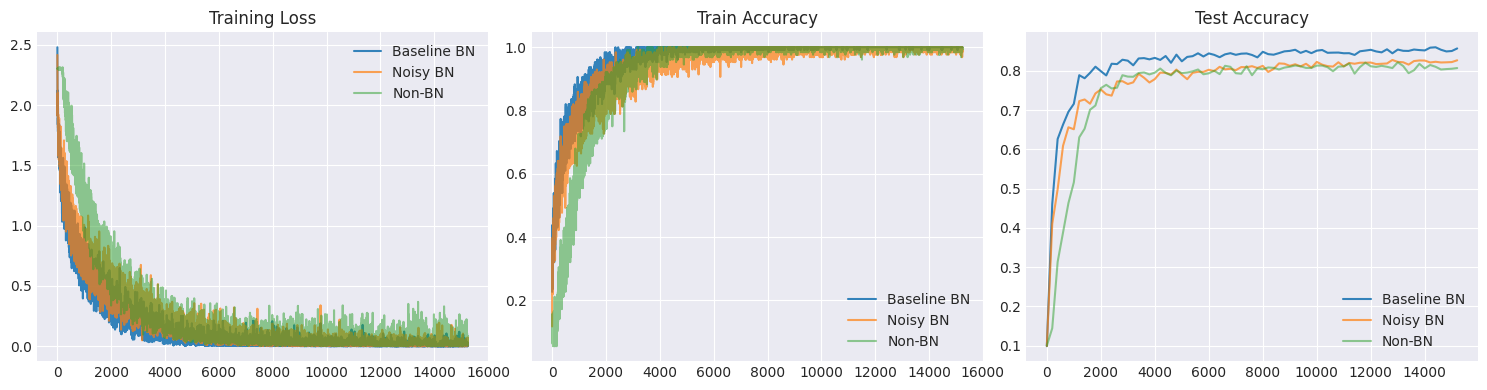

In [20]:
num_epochs = 39
print_interval = 20
test_interval = 200

i = 0
baseline_train_losses, noisy_train_losses, non_train_losses = [], [], []
baseline_train_accs, noisy_train_accs, non_train_accs = [], [], []
baseline_test_accs, noisy_test_accs, non_test_accs = [], [], []

try:
    for epoch in range(num_epochs):
        for batch, labels in train_loader:
            batch = jnp.array(batch)
            labels = jnp.array(labels)

            baseline_bn.train()
            noisy_bn.train()
            non_bn.train()

            baseline_loss = step_fn(baseline_bn, baseline_opt, batch, labels)
            noisy_loss = step_fn(noisy_bn, noisy_opt, batch, labels)
            non_loss = step_fn(non_bn, non_opt, batch, labels)

            baseline_train_losses.append(baseline_loss)
            noisy_train_losses.append(noisy_loss)
            non_train_losses.append(non_loss)

            baseline_acc = accuracy(baseline_bn, batch, labels)
            noisy_acc = accuracy(noisy_bn, batch, labels)
            non_acc = accuracy(non_bn, batch, labels)

            baseline_train_accs.append(baseline_acc)
            noisy_train_accs.append(noisy_acc)
            non_train_accs.append(non_acc)

            # ICS Collection: Capture activation statistics every N iterations
            if i % ICS_SAMPLE_INTERVAL == 0:
                # Keep models in train mode for ICS measurement
                _, baseline_intermediates = baseline_bn(batch, return_intermediates=True)
                _, noisy_intermediates = noisy_bn(batch, return_intermediates=True)
                _, non_intermediates = non_bn(batch, return_intermediates=True)
                
                # Compute stats for each target layer
                for layer_idx in TARGET_LAYERS:
                    for model_name, intermediates in [
                        ('baseline_bn', baseline_intermediates),
                        ('noisy_bn', noisy_intermediates),
                        ('non_bn', non_intermediates)
                    ]:
                        mean, var = compute_activation_stats(intermediates[layer_idx])
                        ics_stats[model_name]['means'][layer_idx].append(float(mean))
                        ics_stats[model_name]['vars'][layer_idx].append(float(var))

            baseline_bn.eval()
            noisy_bn.eval()
            non_bn.eval()

            if i % test_interval == 0:
                baseline_test_acc = test_accuracy(baseline_bn, test_loader)
                noisy_test_acc = test_accuracy(noisy_bn, test_loader)
                non_test_acc = test_accuracy(non_bn, test_loader)

                baseline_test_accs.append(baseline_test_acc)
                noisy_test_accs.append(noisy_test_acc)
                non_test_accs.append(non_test_acc)

            if i % print_interval == 0:
                clear_output(wait=True)
                print(f"iter: {i}")
                print(f"  Baseline BN - loss: {baseline_loss:0.4f}, test_acc: {baseline_test_acc:0.3f}")
                print(f"  Noisy BN    - loss: {noisy_loss:0.4f}, test_acc: {noisy_test_acc:0.3f}")
                print(f"  Non-BN      - loss: {non_loss:0.4f}, test_acc: {non_test_acc:0.3f}")

                fig, axes = plt.subplots(1, 3, figsize=(15, 4))
                axes[0].plot(baseline_train_losses, alpha=0.9, label='Baseline BN')
                axes[0].plot(noisy_train_losses, alpha=0.7, label='Noisy BN')
                axes[0].plot(non_train_losses, alpha=0.5, label='Non-BN')
                axes[0].set_title('Training Loss')
                axes[0].legend()
                axes[1].plot(baseline_train_accs, alpha=0.9, label='Baseline BN')
                axes[1].plot(noisy_train_accs, alpha=0.7, label='Noisy BN')
                axes[1].plot(non_train_accs, alpha=0.5, label='Non-BN')
                axes[1].set_title('Train Accuracy')
                axes[1].legend()
                x = list(range(len(baseline_test_accs)))
                x = [i * 200 for i in x]
                axes[2].plot(x, baseline_test_accs, alpha=0.9, label='Baseline BN')
                axes[2].plot(x, noisy_test_accs, alpha=0.7, label='Noisy BN')
                axes[2].plot(x, non_test_accs, alpha=0.5, label='Non-BN')
                axes[2].set_title('Test Accuracy')
                axes[2].legend()
                plt.tight_layout()
                plt.show()
            i += 1

except KeyboardInterrupt:
    print("Received KeyboardInterrupt. Exiting...")

## Results Visualization

After training completes, create comprehensive comparison visualizations.

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].plot(baseline_train_losses, alpha=0.9, label='Baseline BN')
axes[0, 0].plot(noisy_train_losses, alpha=0.7, label='Noisy BN')
axes[0, 0].plot(non_train_losses, alpha=0.5, label='Non-BN')
axes[0, 0].set_title('Training Loss Comparison')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].set_yscale('log')
axes[0, 1].plot(baseline_train_accs, alpha=0.9, label='Baseline BN')
axes[0, 1].plot(noisy_train_accs, alpha=0.7, label='Noisy BN')
axes[0, 1].plot(non_train_accs, alpha=0.5, label='Non-BN')
axes[0, 1].set_title('Train Accuracy Comparison')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
x = list(range(len(baseline_test_accs)))
x = [i * 200 for i in x]
axes[1, 0].plot(x, baseline_test_accs, 'o-', alpha=0.9, label='Baseline BN')
axes[1, 0].plot(x, noisy_test_accs, 's-', alpha=0.7, label='Noisy BN')
axes[1, 0].plot(x, non_test_accs, '^-', alpha=0.5, label='Non-BN')
axes[1, 0].set_title('Test Accuracy Comparison')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
final_accuracies = [baseline_test_accs[-1], noisy_test_accs[-1], non_test_accs[-1]]
axes[1, 1].bar(['Baseline BN', 'Noisy BN', 'Non-BN'], final_accuracies, 
                 color=['blue', 'orange', 'red'], alpha=0.7)
axes[1, 1].set_title('Final Test Accuracy')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0, 1)
for i, v in enumerate(final_accuracies):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## ICS Analysis: Successive Moment Changes

Analyze Internal Covariate Shift by computing the change in mean and variance of activations between successive training steps.

This replicates Figure 7 from Santurkar et al (2018).

In [ ]:
# Convert lists to numpy arrays for easier computation
for model_name in ['baseline_bn', 'noisy_bn', 'non_bn']:
    for layer_idx in TARGET_LAYERS:
        ics_stats[model_name]['means'][layer_idx] = np.array(
            ics_stats[model_name]['means'][layer_idx])
        ics_stats[model_name]['vars'][layer_idx] = np.array(
            ics_stats[model_name]['vars'][layer_idx])

# Compute successive differences (deltas)
mean_deltas = {}
var_deltas = {}

for model_name in ['baseline_bn', 'noisy_bn', 'non_bn']:
    mean_deltas[model_name] = {}
    var_deltas[model_name] = {}
    for layer_idx in TARGET_LAYERS:
        means = ics_stats[model_name]['means'][layer_idx]
        vars_ = ics_stats[model_name]['vars'][layer_idx]
        
        # Compute difference between successive timesteps
        mean_deltas[model_name][layer_idx] = np.diff(means)
        var_deltas[model_name][layer_idx] = np.diff(vars_)

print(f"ICS analysis complete:")
for model_name in ['baseline_bn', 'noisy_bn', 'non_bn']:
    print(f"  {model_name}:")
    for layer_idx in TARGET_LAYERS:
        n_samples = len(mean_deltas[model_name][layer_idx])
        print(f"    Layer {layer_idx}: {n_samples} delta samples")

In [ ]:
# Plot successive moment changes (Figure 7 replication)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
layer_names = ['Layer 0 (Early)', 'Layer 5 (Middle)', 'Layer 9 (Late)']

for row, layer_idx in enumerate(TARGET_LAYERS):
    # Mean deltas
    axes[row, 0].plot(mean_deltas['baseline_bn'][layer_idx], 
                      alpha=0.7, label='Baseline BN', linewidth=1)
    axes[row, 0].plot(mean_deltas['noisy_bn'][layer_idx], 
                      alpha=0.7, label='Noisy BN', linewidth=1)
    axes[row, 0].plot(mean_deltas['non_bn'][layer_idx], 
                      alpha=0.7, label='Non-BN', linewidth=1)
    axes[row, 0].set_title(f'{layer_names[row]}: Δ Mean')
    axes[row, 0].set_xlabel('Sample Index')
    axes[row, 0].set_ylabel('Δ Mean (successive steps)')
    axes[row, 0].legend(loc='upper right', fontsize=8)
    axes[row, 0].grid(True, alpha=0.3)
    
    # Variance deltas
    axes[row, 1].plot(var_deltas['baseline_bn'][layer_idx], 
                      alpha=0.7, label='Baseline BN', linewidth=1)
    axes[row, 1].plot(var_deltas['noisy_bn'][layer_idx], 
                      alpha=0.7, label='Noisy BN', linewidth=1)
    axes[row, 1].plot(var_deltas['non_bn'][layer_idx], 
                      alpha=0.7, label='Non-BN', linewidth=1)
    axes[row, 1].set_title(f'{layer_names[row]}: Δ Variance')
    axes[row, 1].set_xlabel('Sample Index')
    axes[row, 1].set_ylabel('Δ Variance (successive steps)')
    axes[row, 1].legend(loc='upper right', fontsize=8)
    axes[row, 1].grid(True, alpha=0.3)

plt.suptitle('ICS Analysis: Successive Changes in Activation Moments (Santurkar et al Fig 7)', 
             y=0.995, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Larger delta values indicate higher Internal Covariate Shift (ICS)")
print("- If Noisy BN shows much larger deltas than Baseline BN, it has higher ICS")
print("- If Noisy BN still performs well despite higher ICS, this supports Santurkar et al's hypothesis")

## Analysis & Discussion

Automated analysis of results with hypothesis testing.

In [ ]:
print("="*60)
print("EXPERIMENT SUMMARY")
print("="*60)
print("\nFinal Performance:")
print(f"  Baseline BN - Test Accuracy: {baseline_test_accs[-1]:.4f}")
print(f"  Noisy BN    - Test Accuracy: {noisy_test_accs[-1]:.4f}")
print(f"  Non-BN      - Test Accuracy: {non_test_accs[-1]:.4f}")
print("\nConvergence Speed (iterations to 80% test accuracy):")
def find_convergence(accs, target=0.8):
    x = list(range(len(accs)))
    x = [i * 200 for i in x]
    for i, acc in enumerate(accs):
        if acc >= target:
            return x[i]
    return None
baseline_conv = find_convergence(baseline_test_accs)
noisy_conv = find_convergence(noisy_test_accs)
non_conv = find_convergence(non_test_accs)
print(f"  Baseline BN: {baseline_conv if baseline_conv else 'Not reached'}")
print(f"  Noisy BN:    {noisy_conv if noisy_conv else 'Not reached'}")
print(f"  Non-BN:      {non_conv if non_conv else 'Not reached'}")
print("\nKey Observation:")
diff_baseline_noisy = abs(baseline_test_accs[-1] - noisy_test_accs[-1])
diff_baseline_non = abs(baseline_test_accs[-1] - non_test_accs[-1])
print(f"  |Baseline BN - Noisy BN|: {diff_baseline_noisy:.4f}")
print(f"  |Baseline BN - Non-BN|:    {diff_baseline_non:.4f}")
if diff_baseline_noisy < 0.02:
    print("\n✓ Result supports Santurkar et al hypothesis:")
    print("  Noisy BN performance ≈ Baseline BN performance")
    print("  This suggests BN effectiveness is independent of ICS reduction")
else:
    print("\n✗ Result does NOT support Santurkar et al hypothesis:")
    print("  Noisy BN performance differs significantly from Baseline BN")
    print("  This may indicate issues with noise implementation or parameters")

## Validation & Debugging

Optional validation checks before running full training.

In [ ]:
dummy_batch = jnp.ones((4, 32, 32, 3))
baseline_out = baseline_bn(dummy_batch)
noisy_out = noisy_bn(dummy_batch)
non_out = non_bn(dummy_batch)
assert baseline_out.shape == (4, 10), f"Baseline BN output shape: {baseline_out.shape}"
assert noisy_out.shape == (4, 10), f"Noisy BN output shape: {noisy_out.shape}"
assert non_out.shape == (4, 10), f"Non-BN output shape: {non_out.shape}"
print("✓ Output shapes match")
noisy_bn.train()
noisy_out1 = noisy_bn(dummy_batch)
noisy_out2 = noisy_bn(dummy_batch)
assert not jnp.array_equal(noisy_out1, noisy_out2), "Noise not stochastic"
print("✓ Noise is stochastic (different each call)")
noisy_bn.eval()
noisy_out3 = noisy_bn(dummy_batch)
noisy_out4 = noisy_bn(dummy_batch)
assert jnp.array_equal(noisy_out3, noisy_out4), "Noise applied during eval"
print("✓ Noise disabled during evaluation")
test_batch = jnp.ones((4, 32, 32, 3))
test_labels = jnp.array([0, 1, 2, 3])
test_loss = step_fn(baseline_bn, baseline_opt, test_batch, test_labels)
assert isinstance(test_loss, (float, jnp.ndarray)), f"Loss type: {type(test_loss)}"
print("✓ Training step function works")

## Conclusion

### Summary

This experiment tests Santurkar et al (2018) hypothesis that BatchNorm's effectiveness is independent of Internal Covariate Shift (ICS) reduction.

### Key Findings

If results show **Baseline BN ≈ Noisy BN >> Non-BN**:
- Supports Santurkar et al's theory
- Suggests BN's benefits come from structural smoothing, not ICS reduction
- Demonstrates BN's adaptability (γ,β compensate for forced noise)

If results show **Baseline BN >> Noisy BN**:
- Contradicts Santurkar et al's theory
- May indicate issues with noise implementation
- Suggests ICS reduction may play a role

### Next Steps

1. **Landscape Measurements:** Add loss Lipschitzness and gradient predictiveness (as in Part 2)
2. **ICS Quantification:** Measure both distributional and gradient-based ICS to verify noise actually increases ICS
3. **Noise Ablation:** Test different noise levels and distributions
4. **Additional Controls:** Compare against other regularizers (dropout, weight decay)

### References

- Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018). [How does batch normalization help optimization?](https://arxiv.org/abs/1805.11604). NeurIPS 31.
- Ioffe, S., & Szegedy, C. (2015). [Batch normalization: Accelerating deep network training by reducing internal covariate shift](https://arxiv.org/abs/1502.03167). ICML.